<a href="https://colab.research.google.com/github/renanteod/GCollab/blob/main/roteiro02-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Roteiro Redes Neurais e Deep Learning**
## Utilizar este Notebook para executar os comandos.
**Arquivo de referência:** *Roteiro Redes Neurais e Deep Learning.docx*

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from tensorflow.keras.datasets import cifar10


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


Text(0.5, 1.0, 'Label: [4]')

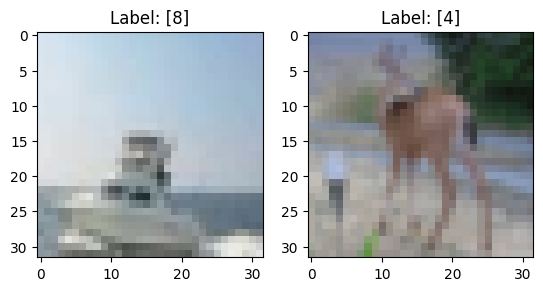

In [4]:
np.unique(y_train)
img = 100
plt.subplot(121)
plt.imshow(x_train[img])
plt.title('Label: {}'.format(y_train[img]))
plt.subplot(122)
plt.imshow(x_test[img])
plt.title('Label: {}'.format(y_test[img]))


In [5]:
x_train = x_train / 255
x_test = x_test / 255

y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)


In [94]:
model=Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(100, (3,3), activation='relu'))
model.add(Conv2D(100, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [95]:
model.compile(optimizer='SGD', #rmsprop, adam , SGD
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],)


In [96]:
progresso = model.fit(x_train, y_train, epochs=100, validation_split=0.1)

Epoch 1/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.1427 - loss: 2.2482 - val_accuracy: 0.2650 - val_loss: 1.9964
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2765 - loss: 1.9532 - val_accuracy: 0.3742 - val_loss: 1.7165
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3541 - loss: 1.7653 - val_accuracy: 0.4146 - val_loss: 1.6132
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3972 - loss: 1.6501 - val_accuracy: 0.4502 - val_loss: 1.4970
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4382 - loss: 1.5491 - val_accuracy: 0.4414 - val_loss: 1.5206
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4629 - loss: 1.4782 - val_accuracy: 0.5204 - val_loss: 1.3276
Epoch 7/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4835 - loss: 1.4075 - val_accuracy: 0.5436 - val_loss: 1.3094
Epoch 8/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5077 - loss:

In [9]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6909 - loss: 1.2325


[1.2651047706604004, 0.6848999857902527]

**Modelo Padrão**

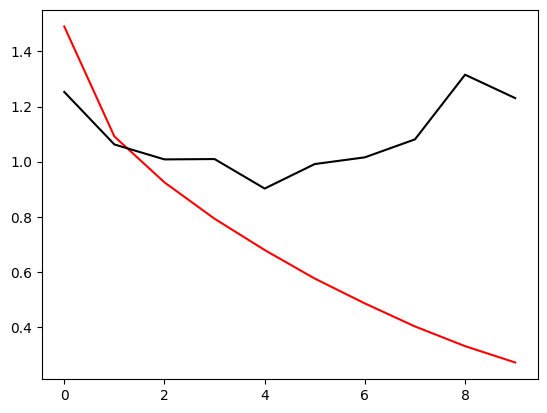

In [10]:
plt.plot(progresso.history['loss'], color='red')
plt.plot(progresso.history['val_loss'], color='black')
plt.show()


In [11]:
pred = model.predict(x_test)
print(pred[0])
print('Index:', np.argmax(pred[0]))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[6.1326874e-03 4.1073477e-03 1.1102055e-03 7.1710283e-01 8.1286591e-05
 2.4176835e-01 2.0446310e-02 1.4283967e-03 6.2767463e-03 1.5459447e-03]
Index: 3


In [12]:
y_classes = [np.argmax(element) for element in pred]
print('Predicted_values: ', y_classes[:10])
print('Actual_values: ', y_test[:10])


Predicted_values:  [np.int64(3), np.int64(8), np.int64(8), np.int64(0), np.int64(4), np.int64(6), np.int64(1), np.int64(6), np.int64(4), np.int64(1)]
Actual_values:  [3 8 8 0 6 6 1 6 3 1]


**Modelo ADAM**

In [15]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6821 - loss: 2.0801


[2.1137776374816895, 0.679099977016449]

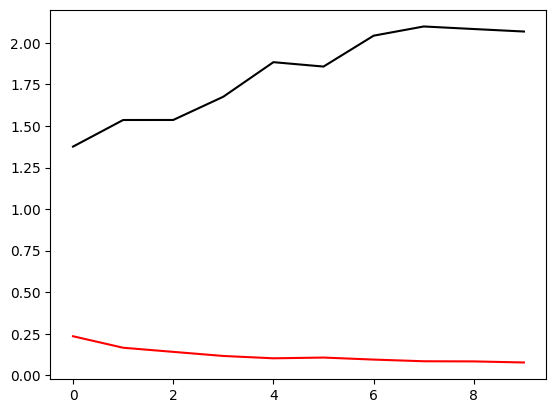

In [16]:
plt.plot(progresso.history['loss'], color='red')
plt.plot(progresso.history['val_loss'], color='black')
plt.show()

**Modelo SGD**

In [19]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7080 - loss: 2.5415


[2.5787646770477295, 0.7053999900817871]

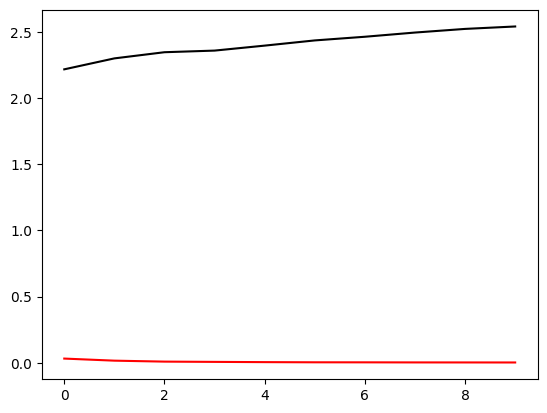

In [20]:
plt.plot(progresso.history['loss'], color='red')
plt.plot(progresso.history['val_loss'], color='black')
plt.show()

**Modelo RMSPROP com alteração de neuronios**


In [25]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6909 - loss: 1.1302


[1.143311858177185, 0.6840000152587891]

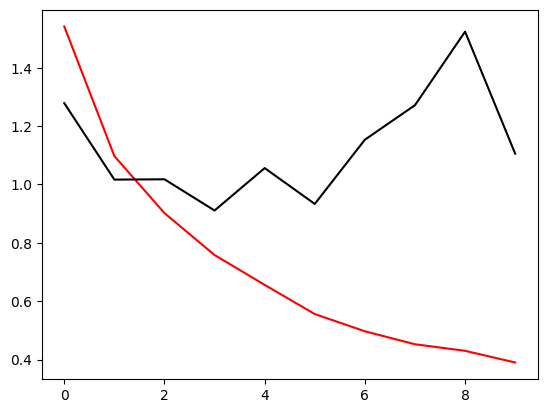

In [26]:
plt.plot(progresso.history['loss'], color='red')
plt.plot(progresso.history['val_loss'], color='black')
plt.show()

**Modelo SGD com alteração de neuronios**

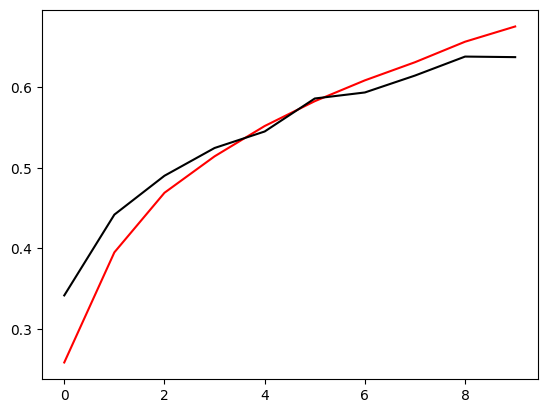

In [37]:
plt.plot(progresso.history['accuracy'], color='red')
plt.plot(progresso.history['val_accuracy'], color='black')
plt.show()

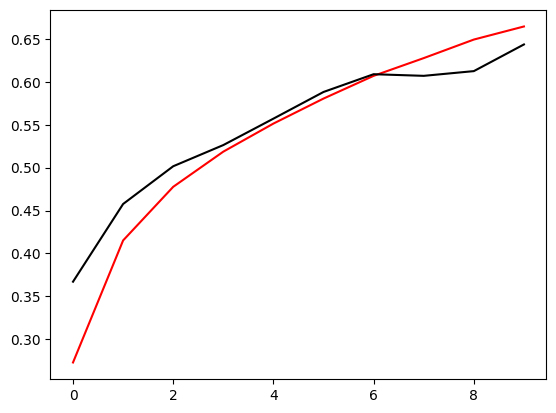

In [41]:
plt.plot(progresso.history['accuracy'], color='red')
plt.plot(progresso.history['val_accuracy'], color='black')
plt.show()

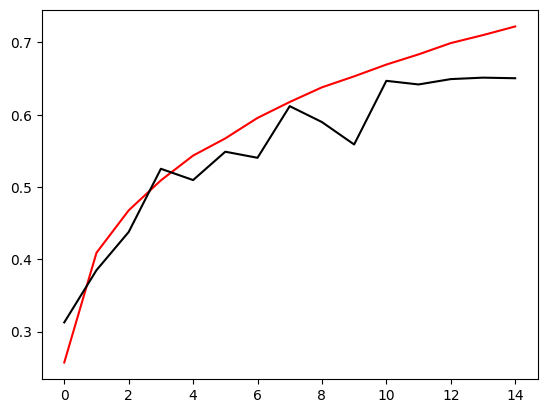

In [80]:
plt.plot(progresso.history['accuracy'], color='red')
plt.plot(progresso.history['val_accuracy'], color='black')
plt.show()

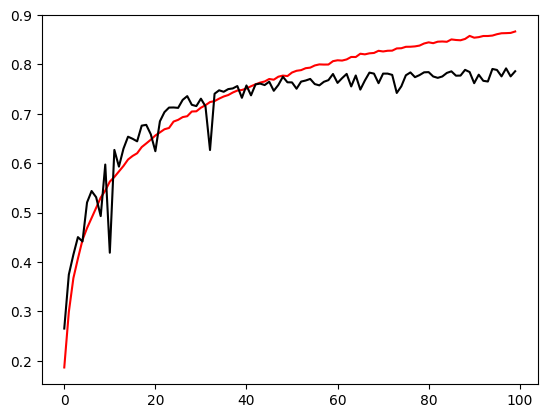

In [97]:
plt.plot(progresso.history['accuracy'], color='red')
plt.plot(progresso.history['val_accuracy'], color='black')
plt.show()